<img align="left" src="https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png" width="1000px"/><br><br><br><br>


# QML (Quantum Machine Learning)

Created: 2022/10/30

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img aling="left" alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />License: <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional</a>.
Internal Reviewers:
* Alba Cervera ([BSC](https://www.bsc.es/))

Authors:
* Carmen Calvo ([SCAYLE](https://www.scayle.es/))
* Antoni Alou ([PIC](https://www.pic.es/))
* Carlos Hernani ([UV](https://www.uv.es/))
* Nahia Iriarte ([NASERTIC](https://www.nasertic.es/es))
* Carlos Luque ([IAC](https://www.iac.es/))

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle \langle #2|} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\tr}{{\rm tr}}$
$ \newcommand{\bn}{{\bf n}} $

Consulta la notación que se ha utilizado durante todo el documento en el siguiente [enlace](#notacion).

# 5. Quantum Kernels

<a id='IntroKernel'></a>
## 5.1. Introducción a los métodos kernel 

Los métodos kernel representan los datos en un número de dimensiones mayor por lo que ayudan a encontrar nuevos patrones en los datos. Los métodos kernel son muy utilizados en aprendizaje supervisado, ya que permiten transformar los problemas no lineales en lineales donde los datos son representandos en un espacio de mayor dimensión.

La expresión general de los kernel es $k(\mathbf{x_{i}},\mathbf{x_{j}}) = \langle  f(\mathbf{x_{i}}), f(\mathbf{x_{j}}) \rangle$ donde $\mathbf{x_{i}}$ y $\mathbf{x_{j}}$ corresponden a los datos de entradas de dimensión $n$, $f$ representa la función que transforma los datos de entradas de dimensión $n$ en un espacio de dimensión $m$ y $\langle \mathbf{a}, \mathbf{b} \rangle$ denota el producto interno. Considerando un conjunto de datos, la función kernel se puede representar mediante una matriz, conocida como **matriz kernel**, $K_{ij} = K(\mathbf{x_{i}},\mathbf{x_{j}})$ [[1]](#references).


A continuación, se muestra un ejemplo visual para comprender la idea en la que se basan los kernel. 


<img src="imagenes/EjemploDataset_kernel.PNG" width="300"/>
<center>Imagen 1. Visualización del dataset de ejemplo en 2D [1]</center>




Este *dataset* (conjunto de datos en español) cuenta con dos clases (azul y morada) y se aprecia una clara estructura en los datos de n dimensiones. Concretamente se distinguen dos circulos cada uno de ellos corresponde a una clase y uno está dentro del otro. Por lo tanto, en dos dimensiones no se puede separar las clases linealmente, en otras palabras, la frontera de decisión no será lineal. Se trata de trasladar los datos a un espacio de dimensión mayor para así poder separar ambas clases. En este caso en particular se define la tercera dimensión como $z =  x^2+y^2$. En la siguiente figura se muestra lo comentado:

<img src="imagenes/featureMap_KERNEL.PNG" width="600"/>
<center>Imagen 2. Visualización del objetivo de los métodos kernel [1] </center>

Se observa que cuando los datos se representan en tres dimensiones existe un hiperplano que clasifica correctamente ambas clases. Proyectando el hiperplano de nuevo en las dimensiones originales la frontera de decisión es no lineal. Cabe destacar que esta manera de trabajar con la no linealidad en los modelos proporcionan la posibilidad de reconocer patrones en el espacio de datos original.

<div class="alert alert-block alert-warning",text-align:center>
<b>NOTA:</b>

En algunas fuentes de información la expresión del kernel se expresa $K(\mathbf{x_{i}},\mathbf{x_{j}}) = \phi(\mathbf{x_{j}})^T \phi(\mathbf{x_{i}})$, en este caso la función que realiza el mapeo se denota mediante $\phi()$. Esta función también se conoce como ***feature map*** [[2]](#references).

</div>

Los métodos kernel son muy utilizados junto al algoritmo *support vector machine* (SVM) en conjuntos de datos no lineales, debido a la transforma de los conjuntos de datos a lineales donde este algoritmo trata de encontrar el hiperplano $(\mathbf{w},b)$ que mejor separa las distintas clases. En este [*enlace*](4_QSVM.ipynb) se puede encontrar más información a cerca de esta técnica de clasificación.

<a id='IntroQuantumKernel'></a>
## 5.2. Introducción al kernel cuántico

Una vez se ha comentado la idea que persiguen los métodos kernel en computación clásica se aborda el funcionamiento de estas técnicas en computación cuántica. Para visualizar la idea general y el funcionamiento de ambos tipos de kernel se adjunta la siguiente imagen: 

<img src="imagenes/ClassicalKernel_QuantumKernel.PNG" width="800"/>

<center>Imagen 3. Comparación entre kernel clásico y cuántico [3]</center>


Como se aprecia en la imagen en ambos casos se trabaja con un *feature map* que se denota como $\phi(\mathbf{x})$, se encarga de transformar los datos del espacio de datos original a un nuevo espacio de características. No obstante, aunque existen similitudes en lo que se refiere al concepto, también se aprecian diferencias en la expresión de la función kernel o que la función kernel cuántica además de llevar a cabo el cambio de dimensión, transforma los datos en **estados cuánticos**.

Tal y como se adelantaba en la comparación de la imagen, al tratar datos clásicos medicante algoritmos de *Quantum Machine Learning* estos mismos deben encargarse de codificar los datos en estados cuánticos para posteriormente poder trabajar con ellos. Este proceso es equivalente a una función _feature map_ que asigna los valores a estados cuánticos, concretamente $\phi(\mathbf{x})$ mapea el vector de características $\mathbf{x}$ en el espacio de Hilbert $\ket{\phi(\mathbf{x})}\bra{\phi(\mathbf{x})}$ [[1]](#references). Mediante la función kernel se lleva a cabo la codificación de los datos, conocida como ***data_encoding***. El quantum kernel se puede interpretar como una medida de similitud, de forma que $k(\mathbf{x_{i}},\mathbf{x_{j}})$ tomará un valor elevado cuando $\mathbf{x_{i}}$ y $\mathbf{x_{j}}$ sean cercanos [[4]](#references).  

La codificación de los datos es una fase fundamental en QML y exiten varias técnicas que abordan este reto, en este [*enlace*](Feature_encoding.ipynb) se puede encontrar más información a cerca de esta temática.

Entender los modelos cuánticos como métodos kernel significa que la expresividad, optimización y el comportamiento al generalizar los modelos están determinados en gran medida por la estrategia de codificación, la cual viene fijada por el método kernel [[5]](#references). Además significa que aunque el propio kernel puede explorar espacios de datos de dimensionalidad alta en el sistema cuántico y los modelos cuánticos pueden entrenar y operar en subespacios de dimensiones más bajas.

Al igual que en el caso clásico, el puente entre el QML y los métodos kernel esta formado por la observación de que los modelos cuánticos mapean los datos en una dimensión superior en la cual la medida define una frontera de decisión lineal.

<a id='ImplementacionesKernel'></a>
## 5.3. Distintas implementaciones de kernel

El entrenamiento basado en métodos kernel pasan por alto el procesado y la medición que implementan los circuitos variacionales, de manera que solo dependerá de la codificación de los datos [[6]](#references).


A continuación se adjunta una implementeación de distintos tipos de métodos kernel. Por un lado, se muestran dos ejemplos de ***Quantum Kernel Estimation*** (QKE). Por otro lado, se adjunta el código para el denominado ***swap test***. Para comprobar el correcto funcionamiento de estos ejemplos, se hará uso del dataset iris, ya que se trata de un problema de clasificación sencillo.

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers

import seaborn as sns

In [2]:
X, y = load_iris(return_X_y=True)

# pick inputs and labels from the first two classes only,
# corresponding to the first 100 samples
X = X[:100]
y = y[:100]

# scaling the inputs is important since the embedding we use is periodic
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# scaling the labels to -1, 1 is important for the SVM and the
# definition of a hinge loss
y_scaled = 2 * (y - 0.5)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=123)

Se adjunta la función _kernel_matrix_, esta será la que se utilice para calcular la matriz kernel. Todas las implementaciones finalizan obteniendo la matriz kernel y mostrandola gráficamente.

In [3]:
def kernel_matrix(kernel,A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])

<a id='SWAPtest'></a>
### 5.3.1. SWAP test

Para implementar el kernel se preparan los estados $\ket{\phi(\mathbf{x_{i}})},\ket{\phi(\mathbf{x_{j}})}$ en conjuntos de cúbits diferentes mediante rutinas de codificación, $U(\mathbf{x_{i}}), U(\mathbf{x_{j}})$. Generalmente este primer paso se suele llevar a cabo mediante rotaciones, en el ejemplo que se muestra a continuación se trabaja con rotaciones en el eje Y. Tras codificar los datos clásicos en estado cuánticos, se mide el solapamiento con una rutina que se denomina ***SWAP test*** [[7]](#references). 


<img src="imagenes/SwapTest_kernel.PNG" width="300"/>
<center>Imagen 4. Circuito asociado a la rutina SWAP test</center>

En la imagen anterior se muestra el circuito necesario para implementar esta rutina y a continuación se implementa esta rutina.

In [4]:
def feature_map(x, wires):
    qml.RY(x[0], wires = wires[0])
    qml.RY(x[1], wires = wires[1])
    
# |<x1|x2>|^2

dev = qml.device("default.qubit", wires = 5)

@qml.qnode(dev)
def kernel_swap(x1,x2):
    
    feature_map(x1, wires = [1,2])
    feature_map(x2, wires = [3,4])
    
    qml.Hadamard(wires = 0)
    qml.CSWAP(wires = [0,1,3])
    qml.CSWAP(wires = [0,2,4])
    qml.Hadamard(wires = 0)
    
    return qml.expval(qml.PauliZ(0))

En la siguiente celda se comprueba el correcto funcionamiento de la función _kernel_swap_ ya que si se mide el solapamiento de un ejemplo con el mismo ejemplo debe devolver 1.

In [5]:
kernel_swap(X_train[0], X_train[0]) #Se comprueba que el funcionamiento es adecuado.

tensor(1., requires_grad=True)

Se analiza la matriz kernel

In [6]:
matriz_swap = kernel_matrix(kernel_swap, X_train, X_train)
print(matriz_swap)

[[1.         0.82872595 0.34428644 ... 0.37617923 0.78864783 0.85436227]
 [0.82872595 1.         0.38357253 ... 0.57388277 0.43492159 0.75465391]
 [0.34428644 0.38357253 1.         ... 0.81354165 0.43456723 0.72042625]
 ...
 [0.37617923 0.57388277 0.81354165 ... 1.         0.25012201 0.63985554]
 [0.78864783 0.43492159 0.43456723 ... 0.25012201 1.         0.81354165]
 [0.85436227 0.75465391 0.72042625 ... 0.63985554 0.81354165 1.        ]]


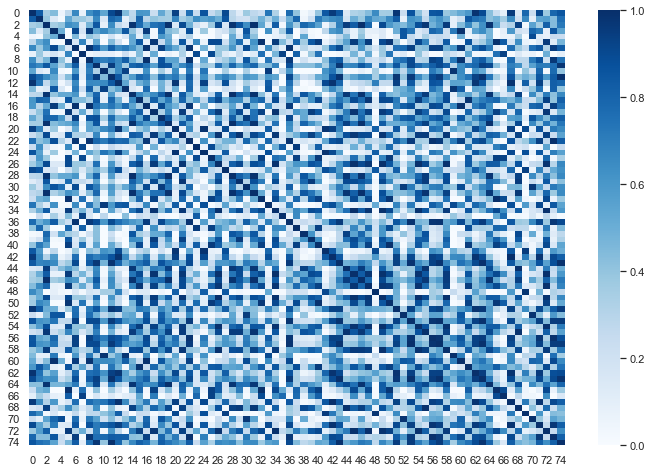

In [7]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(matriz_swap, vmin = 0, vmax = 1, cmap=sns.color_palette("Blues", as_cmap=True));

Se puede observar de la matriz kernel lo siguiente:
1. Cada fila / columna representa la amplitud de transición de una muestra, con todos las demás muestras del conjunto de datos.

2. La amplitud de transición de una muestra consigo mismo es 1, por lo que la matriz tiene una diagonal unitaria.

3. La matriz es simétrica, la amplitud de transición de **x** $\rightarrow$ **y** es igual **y** $\rightarrow$ **x** 

<a id='QKE'></a>
### 5.3.2. Quantum Kernel Estimator


El *Quantum Kernel Estimator*, QKE, necesita la mitad de cúbits comparado con la versión de SWAP test y consiste en aplicar el operador unitario de codificación $\ket{U(\mathbf{x_{i}})}$ y su inverso en los mismos cúbits $\bra{U^{\dagger}(\mathbf{x_{j}})}$ como se visualiza en la imagen 5. 

<img src="imagenes/kernel_circuit_ejemplo.png" width="400"/>
<center>Imagen 5. Circuito asociado a los Quantum Kernel Estimator [8] </center>


Por tanto, la fórmula del kernel, K, se define como,

$$ K(\mathbf{x_{i}},\mathbf{x_{j}}) = |\braket{\phi(\mathbf{x_{j}})}{\phi(\mathbf{x_{i}})}|^2 = |\bra{0..0}U(\mathbf{x_{j}})^{\dagger}U(\mathbf{x_{i}})\ket{0..0}|^2$$

El QKE se puede implementar en dos versiones de circuitos que se expone a continuación:
1. proyector
1. probabilidades

En las siguientes celdas se implementa el mismo kernel de dos formas distintas. En ambos casos la codificación se lleva a cabo mediante _angle embedding_ y luego se aplica el adjunto tal y como se comentaba. La diferencia viene a la hora de calcular el solapamiento, en el primer caso se utiliza el proyector y en el segundo se calcula la probabilidad de $\ket{0}$.

Se hace uso de la codificación ***angle embedding*** por lo que serán necesarios tantos cúbits como carácteristicas tiene el dataset, se puede obtener más información a cerca de esta codificación en el siguiente [*enlace*](Feature_encoding.ipynb#angleEncoding).

En primer lugar, se obtiene el número de características de cada muestra en el dataset Iris, con el que se está trabajando en este ejemplo. Por ello, el número de cúbits será el número de característica por muestra del conjunto de datos.

In [8]:
n_qubits = len(X_train[0])
n_qubits

4

<a id='QKE_proyector'></a>
#### 5.3.2.1. Quantum Kernel Estimator (QKE) - proyector


Esta versión realiza la medida del proyector en el estado inicial $\ketbra{0..0}{0..0}$ [[7]](#references). A continuación, se verifica que lo comentado anteriormente se trata de un kernel.

$$\bra{0..0}U(\mathbf{x_{i}})U(\mathbf{x_{j}})^{\dagger}MU(\mathbf{x_{i}})^{\dagger}U(\mathbf{x_{j}})\ket{0..0} = 
\bra{0..0}U(\mathbf{x_{i}})U(\mathbf{x_{j}})^{\dagger}\ket{0..0}\bra{0..0}U(\mathbf{x_{i}})^{\dagger}U(\mathbf{x_{j}})\ket{0..0} \\= |\bra{0..0}U(\mathbf{x_{i}})^{\dagger}U(\mathbf{x_{j}})\ket{0..0}|^2 \\=  |\braket{\phi(\mathbf{x_{i}})}{\phi(\mathbf{x_{j}})}|^2\\ =  k(\mathbf{x_{i}},\mathbf{x_{j}})$$


En las celdas que se muestran a continuación se adjunta la implementación de *Quantum Kernel Estimator* haciendo uso de un proyector para calcular el solapamiento.

In [9]:
dev_kernel = qml.device("default.qubit", wires=n_qubits)

projector = np.zeros((2**n_qubits, 2**n_qubits))
projector[0, 0] = 1

@qml.qnode(dev_kernel)
def kernel_proyector(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

Se verifica que funciona correctamente el kernel cuántico con un dato consigo mismo. El resultado debería ser 1. 

In [10]:
kernel_proyector(X_train[0], X_train[0]) #Se comprueba que el funcionamiento es adecuado.

tensor(1., requires_grad=True)

Se analiza la matriz kernel

In [11]:
matriz_proyector = kernel_matrix(kernel_proyector, X_train, X_train)
print(matriz_proyector)

[[1.         0.80182806 0.01267406 ... 0.02327014 0.731389   0.84660693]
 [0.80182806 1.         0.00541978 ... 0.02112608 0.3708165  0.74870311]
 [0.01267406 0.00541978 1.         ... 0.78713659 0.05682783 0.01892861]
 ...
 [0.02327014 0.02112608 0.78713659 ... 1.         0.04672834 0.03378712]
 [0.731389   0.3708165  0.05682783 ... 0.04672834 1.         0.73449495]
 [0.84660693 0.74870311 0.01892861 ... 0.03378712 0.73449495 1.        ]]


In [12]:
matriz_proyector.shape

(75, 75)

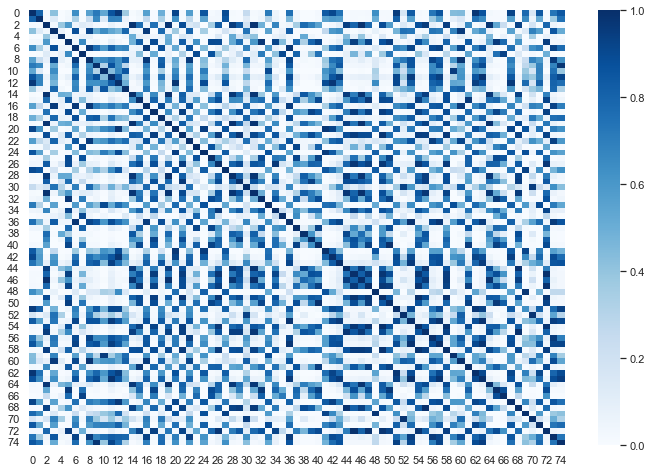

In [13]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(matriz_proyector, vmin = 0, vmax = 1, cmap=sns.color_palette("Blues", as_cmap=True));

<a id='QKE_proba'></a>
#### 5.3.2.2. Quantum Kernel Estimator (QKE) - probabilidades

En este caso sin embargo, en lugar de utilizar el proyector se hace uso de la probabilidad del $\ket{0}$ para calcular el solapamiento.

In [14]:
dev = qml.device("default.qubit", wires = n_qubits)      
@qml.qnode(dev)

def kernel(x1,x2):
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    
    return qml.probs(wires = range(n_qubits))

kernel_prob = lambda x1, x2: kernel(x1, x2)[0]

Se verifica que funciona correctamente el kernel cuántico con un dato consigo mismo. El resultado debería ser 1. 

In [15]:
kernel_prob(X_train[0], X_train[0]) #Se comprueba que el funcionamiento es adecuado.

tensor(1., requires_grad=True)

Se analiza la matriz kernel

In [16]:
matriz_prob = kernel_matrix(kernel_prob,X_train,X_train)
print(matriz_prob)

[[1.         0.80182806 0.01267406 ... 0.02327014 0.731389   0.84660693]
 [0.80182806 1.         0.00541978 ... 0.02112608 0.3708165  0.74870311]
 [0.01267406 0.00541978 1.         ... 0.78713659 0.05682783 0.01892861]
 ...
 [0.02327014 0.02112608 0.78713659 ... 1.         0.04672834 0.03378712]
 [0.731389   0.3708165  0.05682783 ... 0.04672834 1.         0.73449495]
 [0.84660693 0.74870311 0.01892861 ... 0.03378712 0.73449495 1.        ]]


In [17]:
matriz_prob.shape

(75, 75)

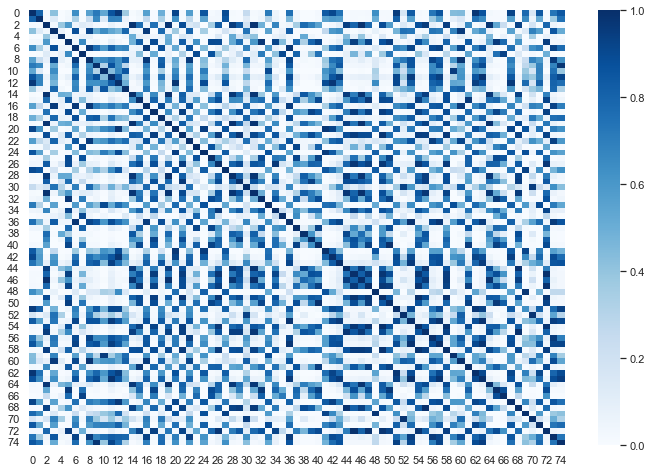

In [18]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(matriz_prob, vmin = 0, vmax = 1, cmap=sns.color_palette("Blues", as_cmap=True));

Como se puede ver es indiferente calcular el solapamiento mediante proyectores o calculando la probabilidad de $\ket{0}$, se puede observar que la matriz kernel es la misma siempre y cuando se aplique el mismo método de codificación.

<a id='notacion'></a>
<div class="alert alert-block alert-warning",text-align:center>
<b>ANEXO NOTACIÓN:</b>

Para que la comprensión de los notebooks sea mejor se ha unificado la notación utilizada en los mismos. Para diferenciar un vector de un valor único se hará uso de la negrita. De manera que $\mathbf{x}$ corresponde a un vector y $z$ será una variable de una única componente. 

    
Si se quiere hacer referencia a dos vectores distintos pero que pertenecen al mismo *dataset* se utilizará un subíndice, es decir, $\mathbf{x_i}$ hará referencia al i-ésimo vector del dataset. Si se quiere referenciar una característica concreta del vector se añadirá un nuevo subíndice, de manera que $\mathbf{x_{i_j}}$ hará referencia a la j-ésima variable del i-ésimo vector.

</div>

---------------------------
## Referencias
<a id='references'></a>

[1].  https://learn.qiskit.org/course/machine-learning/quantum-feature-maps-kernels<br>
[2].  https://www.jmlr.org/papers/volume2/genton01a/genton01a.pdf?ref=https://githubhelp.com<br>
[3].  https://github.com/PaddlePaddle/Quantum/blob/master/tutorials/machine_learning/QKernel_EN.ipynb<br>
[4].  https://arxiv.org/pdf/2011.01938.pdf<br>
[5].  https://arxiv.org/pdf/2101.11020.pdf<br>
[6].  https://projecteuclid.org/journals/annals-of-statistics/volume-36/issue-3/Kernel-methods-in-machine-learning/10.1214/009053607000000677.full <br>
[7].  https://pennylane.ai/qml/demos/tutorial_kernel_based_training.html<br>
[8].  https://people.eecs.berkeley.edu/~yunchaoliu/slides/quantumkernel_IBM.pdf<br>

This work has been financially supported by the Ministry of Economic Affairs and Digital Transformation of the Spanish Government through the QUANTUM ENIA project call - Quantum Spain project, and by the European Union through the Recovery, Transformation and Resilience Plan - NextGenerationEU within the framework of the Digital Spain 2025 Agenda.


<img align="left" src="https://quantumspain-project.es/wp-content/uploads/2022/11/LOGOS-GOB_QS.png" width="1000px" />